<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
#Заметим, что  числовой признак 'TotalSpent'  представлен обьектами,а не числами.Исправим это.
data['TotalSpent']=pd.to_numeric(data['TotalSpent'],errors='coerce')

In [ ]:
#Выведем табличку nan'ов в каждой колонке
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
#Избавимся от nan'ов
data=data.dropna()

In [ ]:
#Выведем табличку nan'ов в каждой колонке еще раз,чтобы понять что везде наны
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

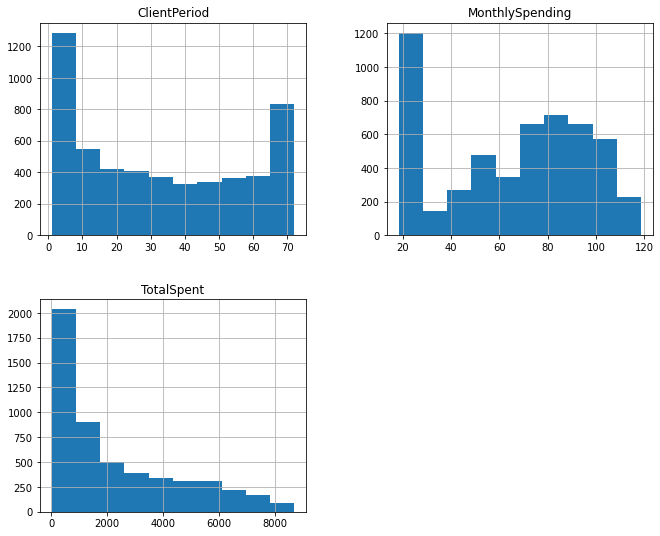

In [ ]:
#Построим графики для численных значений
data.hist(column = num_cols, figsize=(11, 9))
print()

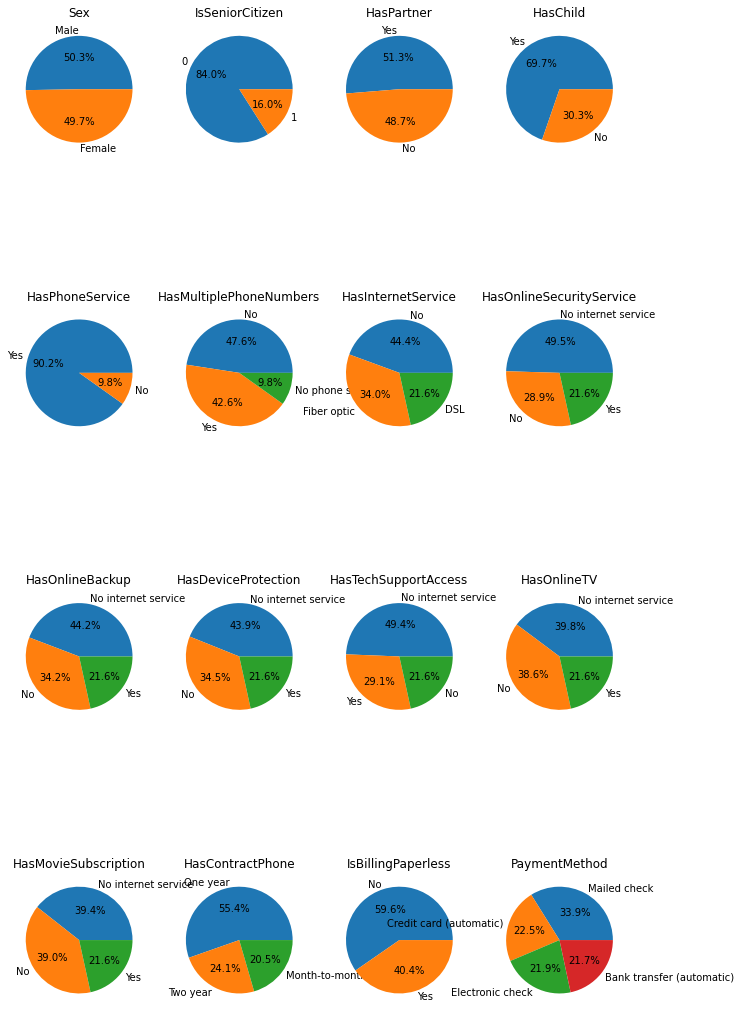

In [ ]:
#Построим графики для категориальных значений
plt.figure(figsize=(11, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 4, i+1)
    plt.pie(data[col].value_counts(), labels = data[col].unique(), autopct='%1.1f%%')
    plt.title(col)

0    3889
1    1384
Name: Churn, dtype: int64

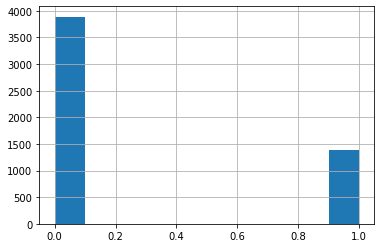

In [ ]:
#Посмортим на распределение целевой переменной

data[target_col].hist()
data[target_col].value_counts()

In [ ]:
#Датасет довольно сбалансирован, класса 1 где то в 2,8 раз меньше класса 0

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
#Реализуем One-hot encoding и запишем новую,закодированную таблицу в переменную X; 
dummy_features = pd.get_dummies(data[cat_cols])
X= pd.concat([data[num_cols], dummy_features], axis=1)
X_origin=data.iloc[:, :-1] #незакодированную one hot encoding'ом таблицу сохраним в переменную X_origin для catboost'a
y=data[target_col] #запишем в переменную y значения целевой переменной
print(X.columns)

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen',
       'Sex_Female', 'Sex_Male', 'HasPartner_No', 'HasPartner_Yes',
       'HasChild_No', 'HasChild_Yes', 'HasPhoneService_No',
       'HasPhoneService_Yes', 'HasMultiplePhoneNumbers_No',
       'HasMultiplePhoneNumbers_No phone service',
       'HasMultiplePhoneNumbers_Yes', 'HasInternetService_DSL',
       'HasInternetService_Fiber optic', 'HasInternetService_No',
       'HasOnlineSecurityService_No',
       'HasOnlineSecurityService_No internet service',
       'HasOnlineSecurityService_Yes', 'HasOnlineBackup_No',
       'HasOnlineBackup_No internet service', 'HasOnlineBackup_Yes',
       'HasDeviceProtection_No', 'HasDeviceProtection_No internet service',
       'HasDeviceProtection_Yes', 'HasTechSupportAccess_No',
       'HasTechSupportAccess_No internet service', 'HasTechSupportAccess_Yes',
       'HasOnlineTV_No', 'HasOnlineTV_No internet service', 'HasOnlineTV_Yes',
       'HasMovieSubscription_No', 'Has

In [ ]:
# Разделим на train и test 
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                    random_state=36)

In [ ]:
#Отнормируем числовые данные с помощью StandartScaller
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

In [ ]:
#Применим LogisticRegressionCV
LogReg = LogisticRegressionCV(cv = 5, scoring='roc_auc', n_jobs = -1)
LogReg.fit(x_train, y_train)


0.8431547138706998 0.8713940926330306


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
# Выведем наилучшие результаты.Ура они выше 0.84
print(LogReg.score(x_train, y_train), LogReg.score(x_test,y_test))

0.8431547138706998 0.8713940926330306


In [ ]:
#Выведем наилучшие параметры
LogReg.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=0)>

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
#установим CATBOOST
!pip install catboost
import catboost

In [ ]:
#Разделим на выборку,не забудем что будем уже брать переменную X_origin a не X (без one-hot-encoding)
X_train_origin , X_test_origin, y_train, y_test= train_test_split(X_origin,
                                                                 y,
                                                                 train_size = 0.8,
                                                                 random_state = 36)


In [86]:
#Обучим модель со стандартными параметрами
cat_model = catboost.CatBoostClassifier(eval_metric='AUC')
cat_model.fit(X_train_origin, y_train, cat_features=cat_cols)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.019048
0:	total: 15.8ms	remaining: 15.8s
1:	total: 21.7ms	remaining: 10.8s
2:	total: 36.7ms	remaining: 12.2s
3:	total: 48.8ms	remaining: 12.2s
4:	total: 61.3ms	remaining: 12.2s
5:	total: 72.2ms	remaining: 12s
6:	total: 78.3ms	remaining: 11.1s
7:	total: 92.1ms	remaining: 11.4s
8:	total: 107ms	remaining: 11.7s
9:	total: 120ms	remaining: 11.9s
10:	total: 133ms	remaining: 12s
11:	total: 147ms	remaining: 12.1s
12:	total: 158ms	remaining: 12s
13:	total: 167ms	remaining: 11.8s
14:	total: 179ms	remaining: 11.7s
15:	total: 198ms	remaining: 12.2s
16:	total: 208ms	remaining: 12s
17:	total: 216ms	remaining: 11.8s
18:	total: 226ms	remaining: 11.7s
19:	total: 239ms	remaining: 11.7s
20:	total: 252ms	remaining: 11.7s
21:	total: 266ms	remaining: 11.8s
22:	total: 279ms	remaining: 11.9s
23:	total: 285ms	remaining: 11.6s
24:	total: 297ms	remaining: 11.6s
25:	total: 311ms	remaining: 11.7s
26:	total: 325ms	remaining: 11.7s
27:	total: 337ms	remaining: 11.7s
28:	total: 350ms	remaining: 

In [ ]:
#Узнаем результаты
cat_roc_auc_train=roc_auc_score(y_train, cat_model.predict_proba(X_train_origin)[:, 1])
cat_roc_auc_test=roc_auc_score(y_test, cat_model.predict_proba(X_test_origin)[:, 1])
print(cat_roc_auc_train,cat_roc_auc_test)

0.8891927683759108 0.86173524116002


In [ ]:
#Очень впечатляют 0.889 и 0.861

In [ ]:
#Подберем наилучшие параметры
boosting_model = catboost.CatBoostClassifier(eval_metric='AUC',cat_features=cat_cols)
best_model_parms = boosting_model.grid_search({'learning_rate': [0.01,0.445,0.62], 
                            'n_estimators': [100,200,400,600],'depth': [3, 4, 6]},
                           x_train_origin, 
                           y_train,
                           cv=5,
                            plot=True,
                            refit=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
212:	test: 0.8163310	best: 0.8412206 (19)	total: 1.81s	remaining: 1.59s
213:	test: 0.8175588	best: 0.8412206 (19)	total: 1.82s	remaining: 1.58s
214:	test: 0.8175803	best: 0.8412206 (19)	total: 1.83s	remaining: 1.57s
215:	test: 0.8176665	best: 0.8412206 (19)	total: 1.84s	remaining: 1.57s
216:	test: 0.8173003	best: 0.8412206 (19)	total: 1.85s	remaining: 1.56s
217:	test: 0.8155412	best: 0.8412206 (19)	total: 1.85s	remaining: 1.55s
218:	test: 0.8159935	best: 0.8412206 (19)	total: 1.86s	remaining: 1.54s
219:	test: 0.8155268	best: 0.8412206 (19)	total: 1.88s	remaining: 1.54s
220:	test: 0.8157710	best: 0.8412206 (19)	total: 1.89s	remaining: 1.53s
221:	test: 0.8155484	best: 0.8412206 (19)	total: 1.9s	remaining: 1.52s
222:	test: 0.8157745	best: 0.8412206 (19)	total: 1.9s	remaining: 1.51s
223:	test: 0.8156597	best: 0.8412206 (19)	total: 1.91s	remaining: 1.5s
224:	test: 0.8163130	best: 0.8412206 (19)	total: 1.92s	remaining: 1.49s

In [97]:
#Посчитаем лучшие значения скор для наших параметров
print(roc_auc_score(y_train, boosting_model.predict_proba(x_train_origin)[:, 1]))
print(roc_auc_score(y_test, boosting_model.predict_proba(x_test_origin)[:, 1]))

0.8887464839066679
0.8589458108263418


In [90]:
#Посмотрим параметры нашей лучшей модели
best_model_parms['params'] 

{'depth': 3, 'iterations': 200, 'learning_rate': 0.445}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [98]:
best_model = boosting_model

In [100]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv',index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.